<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
penguim = sns.load_dataset('penguins')

In [ ]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

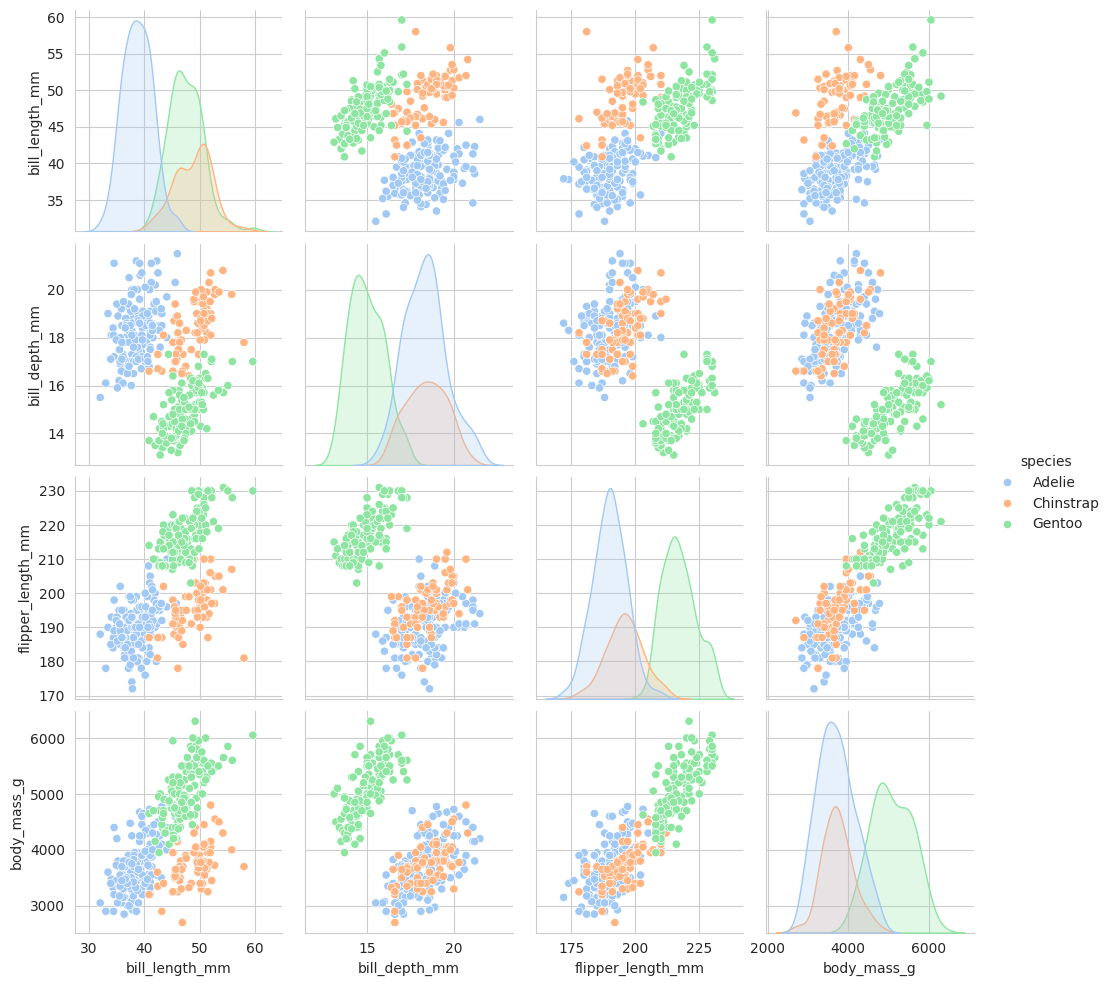

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

**Comentário:**
É possível observar que flipper_length_mm e bill_length_mm ajudam bastante a distinguir espécies:


 - Sexo por espécie:

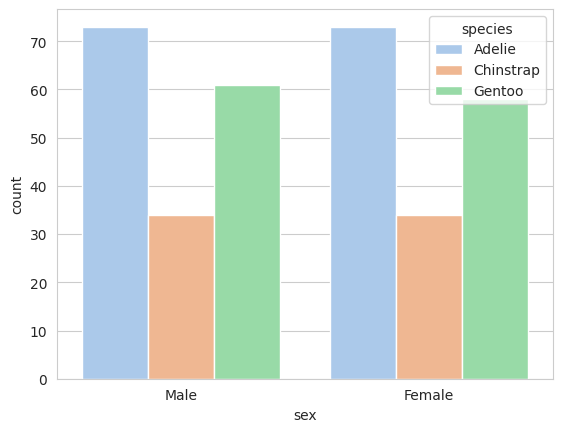

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

**Comentário:**
- Há diferença de distribuição entre os sexos nas espécies.


 - Ilha por espécie:

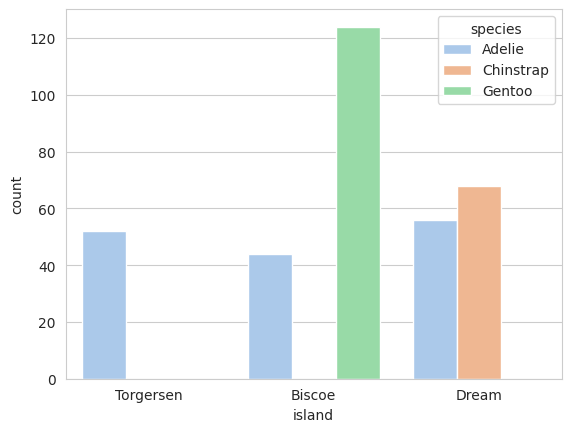

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**Comentário:** - Cada espécie tende a se concentrar em ilhas específicas.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [ ]:
# resposta da questão 2.1
#Verificando valores nulos
print(penguim.isnull().sum())

# Removendo linhas com valores nulos
penguim = penguim.dropna()

# Confirmando remoção
print(penguim.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

In [ ]:
# resposta da questão 2.2
from sklearn.preprocessing import LabelEncoder

# Vamos usar a base limpa após remoção de valores nulos
df = penguim.copy()

# Verificando tipos de dados
print(df.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [ ]:
# categóricas nominais (sem ordem): island, sex
# A variável resposta 'species' NÃO será transformada

nominais = ['island', 'sex']
label_encoder = LabelEncoder()

for coluna in nominais:
    df[coluna + '_nom'] = label_encoder.fit_transform(df[coluna])

print(df[['island', 'island_nom', 'sex', 'sex_nom']].head(10))

       island  island_nom     sex  sex_nom
0   Torgersen           2    Male        1
1   Torgersen           2  Female        0
2   Torgersen           2  Female        0
4   Torgersen           2  Female        0
5   Torgersen           2    Male        1
6   Torgersen           2  Female        0
7   Torgersen           2    Male        1
12  Torgersen           2  Female        0
13  Torgersen           2    Male        1
14  Torgersen           2    Male        1


### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

In [ ]:
# resposta da questão 2.3

# lista de colunas a manter
colunas_para_manter = ['species'] + [col for col in df.columns if col not in ['island', 'sex', 'species']]

# Reorganizando o DataFrame
df_final = df[colunas_para_manter]

# Exibindo as primeiras linhas para confirmação
print(df_final.head())

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie            39.1           18.7              181.0       3750.0   
1  Adelie            39.5           17.4              186.0       3800.0   
2  Adelie            40.3           18.0              195.0       3250.0   
4  Adelie            36.7           19.3              193.0       3450.0   
5  Adelie            39.3           20.6              190.0       3650.0   

   island_nom  sex_nom  
0           2        1  
1           2        0  
2           2        0  
4           2        0  
5           2        1  


### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split

# Definindo X (atributos) e y (variável resposta)
x = df_final.drop(columns='species')
y = df_final['species']

# Separando os dados: 2/3 treino e 1/3 teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=42, stratify=y)

# Verificando os tamanhos
print(f'Tamanho do conjunto de treino: {X_train.shape[0]} amostras')
print(f'Tamanho do conjunto de teste: {X_test.shape[0]} amostras')

Tamanho do conjunto de treino: 222 amostras
Tamanho do conjunto de teste: 111 amostras


## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

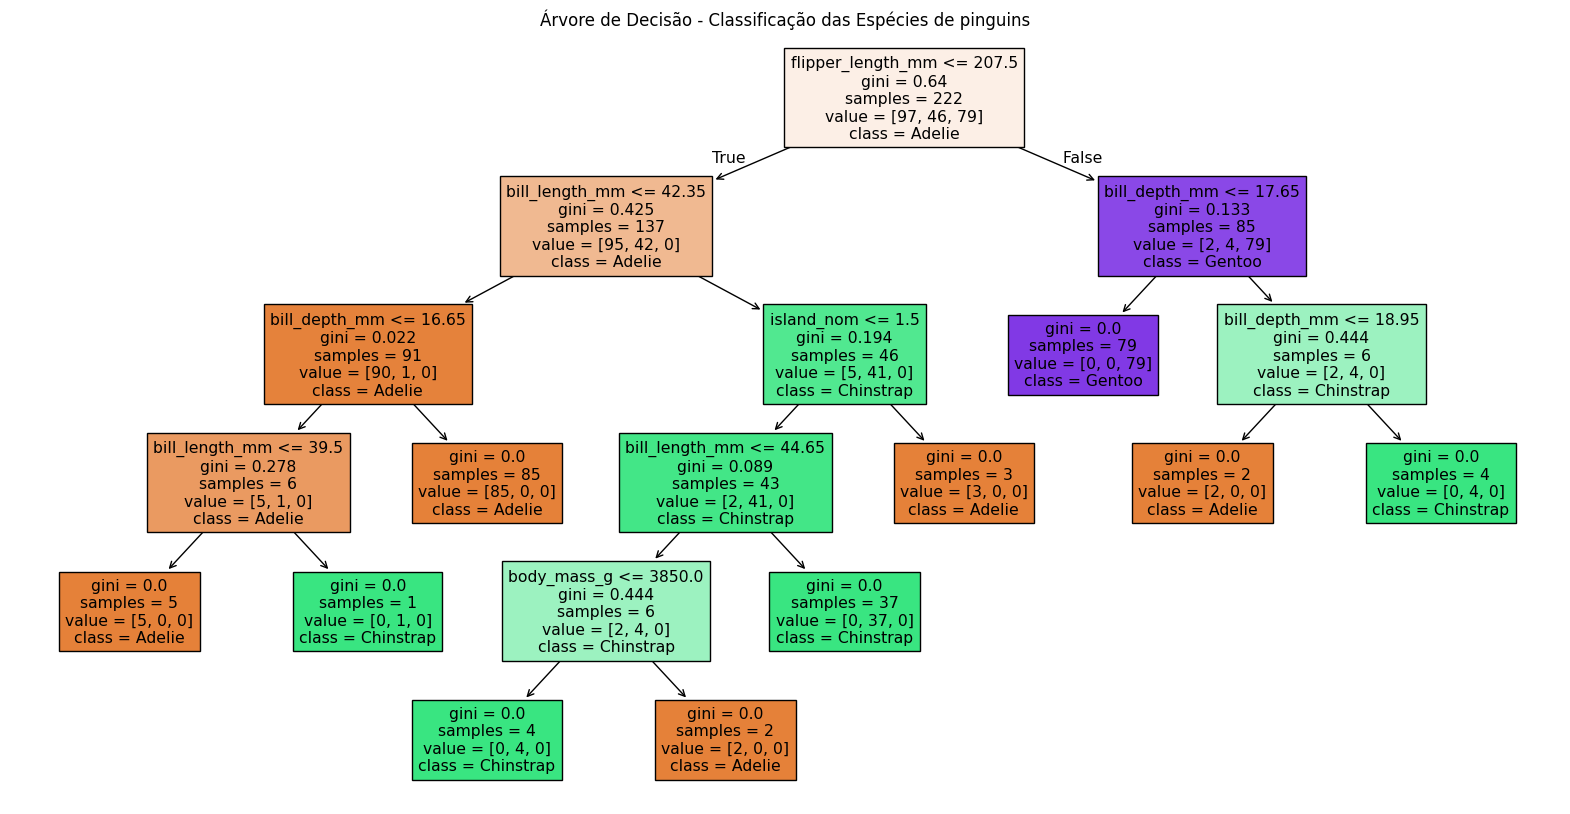

In [ ]:
# resposta da questão 3.1
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Treinando o modelo
modelo_arvore = DecisionTreeClassifier(random_state=42)
modelo_arvore.fit(X_train, y_train)

# Gerando o gráfico da árvore
plt.figure(figsize=(20, 10))
plot_tree(modelo_arvore, filled=True, feature_names=x.columns, class_names=modelo_arvore.classes_)
plt.title('Árvore de Decisão - Classificação das Espécies de pinguins')
plt.show()


**Resposta:** A Arvore treinada possui entre 6 e 10 folhas, mas isso pode variar.

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

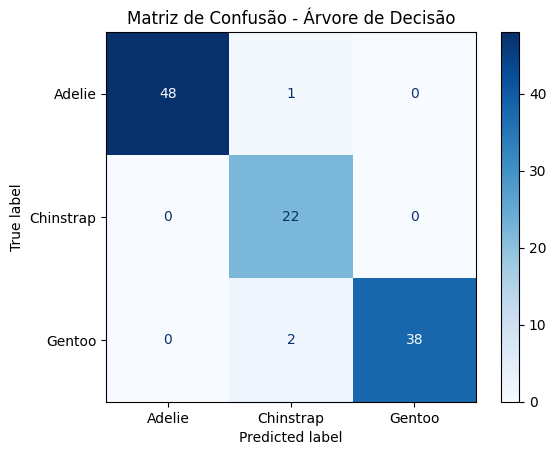

In [ ]:
# resposta da questão 3.2.a
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Fazendo previsões
y_pred = modelo_arvore.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=modelo_arvore.classes_)

# Visualizando a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_arvore.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

**Comentário:**
O modelo teve um bom desempenho geral. A maioria dos pinguins foi classificada corretamente, com poucos erros entre as espécies . A confusão mais comum ocorreu entre as espécies Adelie e Chinstrap, que possuem características físicas semelhantes. A matriz mostra que o model consegue distinguir bem os pinguins da espécie Gentoo, com quase nenhum erro de classificação para essa classe.

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [ ]:
# resposta da questão 3.2.b
from sklearn.metrics import accuracy_score

# Calculando a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.2%}')

Acurácia do modelo: 97.30%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [ ]:
# resposta da questão 4.1
island_encoder = LabelEncoder()
island_encoder.fit(df['island'])

sex_encoder = LabelEncoder()
sex_encoder.fit(df['sex'])

#Convertendo as variáveis categóricas do novo pinguim
island_nom = island_encoder.transform(['Biscoe'])[0]
sex_nom = sex_encoder.transform(['Male'])[0]

# Criando o array com os dados na ordem de X.columns
novo_pinguim = np.array([[island_nom, 38.2, 18.1, 185.0, 3950.0, sex_nom]])

# Fazendo a predição
especie_predita = modelo_arvore.predict(novo_pinguim)[0]
print(f'Espécie predita para o novo pinguim: {especie_predita}')

Espécie predita para o novo pinguim: Adelie


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


---